In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import equalize, otsu
from skimage.morphology import ball

import napari
%gui qt

In [3]:
from skimage import io

In [4]:
def normalize_pixels(i):
    i = 256*(i/np.amax(i))
    return i.astype(np.uint8)

In [29]:
im = io.imread("classic.tif")

In [30]:
print(np.amax(im), np.amin(im), im)

40851 11463 [[[12454 12398 12418 ... 11923 11618 11518]
  [12305 12121 12390 ... 11805 11700 11710]
  [12580 12719 12781 ... 11901 11733 11619]
  ...
  [11951 12203 12190 ... 12084 12104 12105]
  [11893 12091 12526 ... 12258 12232 12299]
  [12234 12247 12820 ... 12425 12390 12404]]

 [[12810 12959 12288 ... 11794 11674 11777]
  [12745 12718 12323 ... 11463 11678 11616]
  [12451 12748 12491 ... 11828 11876 11643]
  ...
  [12175 12363 12488 ... 12332 12370 12193]
  [12066 12379 12568 ... 12276 12529 12408]
  [12491 12659 12866 ... 12391 12309 12221]]

 [[12417 12233 12418 ... 11693 11690 11682]
  [12484 12564 12641 ... 11602 11653 11715]
  [12356 12571 12615 ... 11656 11773 11844]
  ...
  [12411 12594 12574 ... 12202 12078 12149]
  [12365 12376 12370 ... 12397 12050 12215]
  [12324 12273 12351 ... 12333 12123 12081]]

 ...

 [[12404 12559 12570 ... 12336 12164 12202]
  [12251 12368 12501 ... 11759 11837 12741]
  [12426 12389 12611 ... 11853 11931 11975]
  ...
  [12218 12202 12143 ... 123

In [31]:
viewer = napari.view_image(im)

In [8]:
im.shape

(11, 101, 101)

In [9]:
im = im - np.amin(im)

In [10]:
im = normalize_pixels(im)

In [24]:
otsu_im = otsu(im, ball(50))

In [25]:
otsu_im_final = im >= otsu_im

In [26]:
# print(np.amax(otsu_im), np.amin(otsu_im), otsu_im)

In [27]:
viewer = napari.view_image(otsu_im_final)

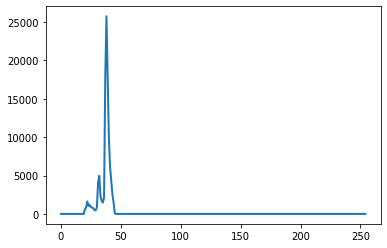

In [28]:
hist = np.histogram(otsu_im, bins=np.arange(0, 256))

plt.figure(1)
plt.plot(hist[1][:-1], hist[0], lw = 2)

In [32]:
# from skimage.morphology import remove_small_objects

In [33]:
# thresholded_filtered = remove_small_objects(otsu_im_final, min_size = 60)

In [34]:
# viewer = napari.view_image(thresholded_filtered)